# Import library yang dibutuhkan

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# membaca dataset 

In [50]:
df = pd.read_excel('pengangguran.xlsx') 

In [51]:
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,pendidikan,jumlah_pengangguran,satuan,tahun
0,1,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,SD KE BAWAH,90529.0,ORANG,2011.0
1,2,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,SMP,38379.0,ORANG,2011.0
2,3,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,SMA,93730.0,ORANG,2011.0
3,4,32.0,JAWA BARAT,3202.0,KABUPATEN SUKABUMI,SD KE BAWAH,33242.0,ORANG,2011.0
4,5,32.0,JAWA BARAT,3202.0,KABUPATEN SUKABUMI,SMP,28191.0,ORANG,2011.0


# persiapan dataset

In [52]:
X = df.drop(['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota', 'satuan'], axis=1)

In [53]:
print(X)

     nama_kabupaten_kota   pendidikan  jumlah_pengangguran   tahun
0        KABUPATEN BOGOR  SD KE BAWAH              90529.0  2011.0
1        KABUPATEN BOGOR          SMP              38379.0  2011.0
2        KABUPATEN BOGOR          SMA              93730.0  2011.0
3     KABUPATEN SUKABUMI  SD KE BAWAH              33242.0  2011.0
4     KABUPATEN SUKABUMI          SMP              28191.0  2011.0
...                  ...          ...                  ...     ...
1426                 NaN          NaN                  NaN     NaN
1427                 NaN          NaN                  NaN     NaN
1428                 NaN          NaN                  NaN     NaN
1429                 NaN          NaN                  NaN     NaN
1430                 NaN          NaN                  NaN     NaN

[1431 rows x 4 columns]


# Mengubah data kategori menjadi kode numerik

In [54]:
df = pd.get_dummies(df, columns=['nama_kabupaten_kota', 'pendidikan'], drop_first=True)

In [55]:
print(X.dtypes)

nama_kabupaten_kota     object
pendidikan              object
jumlah_pengangguran    float64
tahun                  float64
dtype: object


In [56]:
print(X.columns)

Index(['nama_kabupaten_kota', 'pendidikan', 'jumlah_pengangguran', 'tahun'], dtype='object')


In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['nama_kabupaten_kota'] = label_encoder.fit_transform(X['nama_kabupaten_kota'])
X['pendidikan'] = label_encoder.fit_transform(X['pendidikan'])

In [58]:
print(X.head())

   nama_kabupaten_kota  pendidikan  jumlah_pengangguran   tahun
0                    3           2              90529.0  2011.0
1                    3           5              38379.0  2011.0
2                    3           3              93730.0  2011.0
3                   15           2              33242.0  2011.0
4                   15           5              28191.0  2011.0


In [59]:
X = X.dropna()

# menentukan jumlah cluster dengan elbow

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kme

Text(4, 150000, 'Possible elbow point')

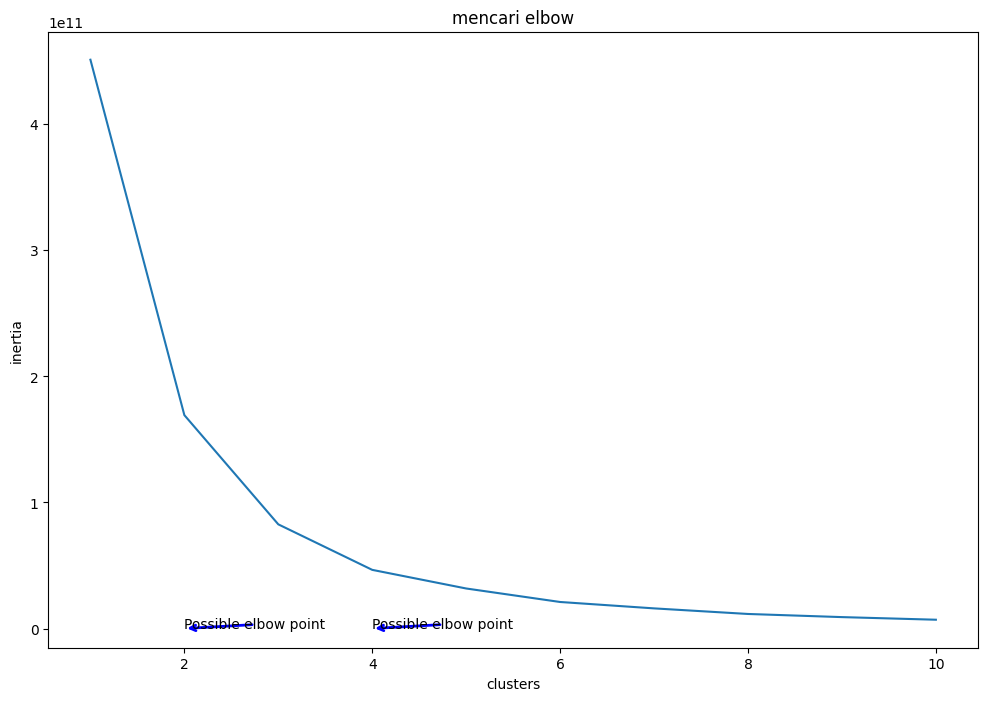

In [60]:
clusters=[]
for i in range(1,11):
    kmean =KMeans(n_clusters=i).fit(X)
    clusters.append(kmean.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(2, 140000), xytext=(2,50000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Possible elbow point', xy=(4, 80000), xytext=(4,150000),xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))


# proses clustering

In [61]:
n_clust= 3
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


plt.figure(figsize=(10,8))
sns.scatterplot(X['nama_kabupaten_kota'], X['pendidikan'], X['jumlah_pengangguran'], X['tahun'], hue=X['Labels'], markers=True, size=X['Labels'], palette=sns.color_palette('hls', n_clust))

for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels']==label]['nama_kabupaten_kota'].mean(),
                  X[X['Labels']==label]['pendidikan'].mean(),
                  X[X['Labels']==label]['jumlah_pengangguran'].mean(),
                  X[X['Labels']==label]['tahun'].mean()),
                  horizontalallignment = 'center',
                  verticalallignment = 'center',
                  size = 20, weight='bold',
                  color = 'black')

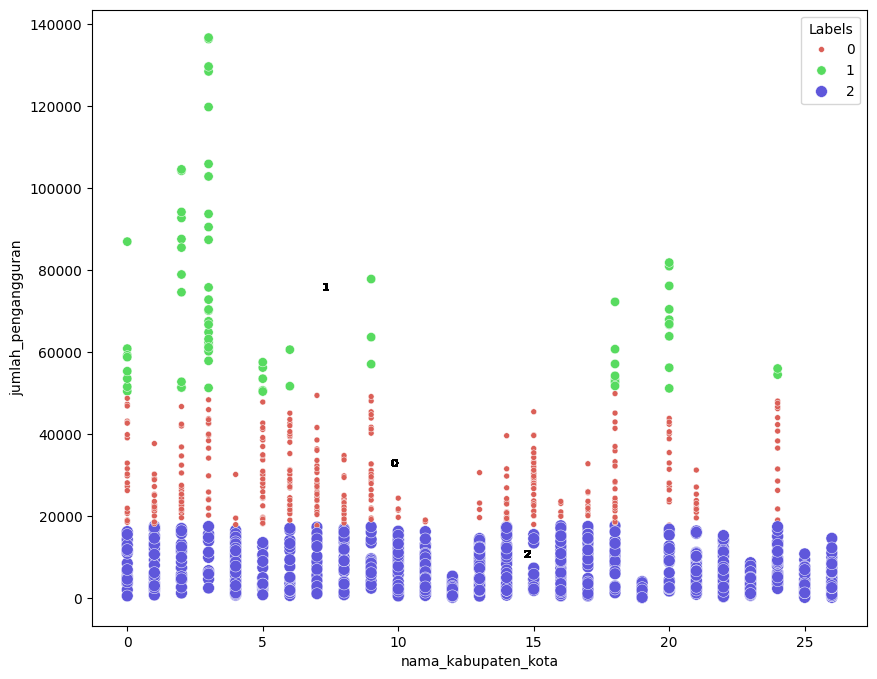

In [62]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X['nama_kabupaten_kota'], y=X['jumlah_pengangguran'], hue=X['Labels'], size=X['Labels'], palette=sns.color_palette('hls', n_clust), markers=True)

for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels']==label]['nama_kabupaten_kota'].mean(),
                  X[X['Labels']==label]['jumlah_pengangguran'].mean()),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center',
                 fontsize=8,
                 weight='bold',
                 color='black'
                )

plt.show()


In [63]:
print(X)

      nama_kabupaten_kota  pendidikan  jumlah_pengangguran   tahun  Labels
0                       3           2              90529.0  2011.0       1
1                       3           5              38379.0  2011.0       0
2                       3           3              93730.0  2011.0       1
3                      15           2              33242.0  2011.0       0
4                      15           5              28191.0  2011.0       0
...                   ...         ...                  ...     ...     ...
1371                   19           2                331.0  2022.0       2
1372                   19           5               1169.0  2022.0       2
1373                   19           3               1679.0  2022.0       2
1374                   19           4               1942.0  2022.0       2
1375                   19           0                122.0  2022.0       2

[1376 rows x 5 columns]


plt.plot(df['tahun'], df['jumlah_pengangguran'], marker='o', linestyle='-')

# Menambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengangguran')
plt.title('Grafik Turun Naik Data per Tahun')

# Menampilkan grafik
plt.show()

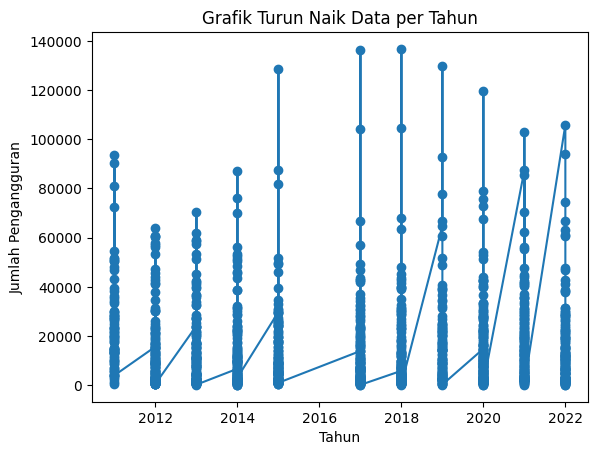

In [64]:
plt.plot(df['tahun'], df['jumlah_pengangguran'], marker='o', linestyle='-')

# Menambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengangguran')
plt.title('Grafik Turun Naik Data per Tahun')

# Menampilkan grafik
plt.show()

In [65]:
X.to_excel("output_clusters.xlsx")